In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("BAJFINANCE.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


WAP stands for Weighted Average Price

In [3]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [4]:
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
df.set_index("Date", inplace=True)

In [6]:
df.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [7]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


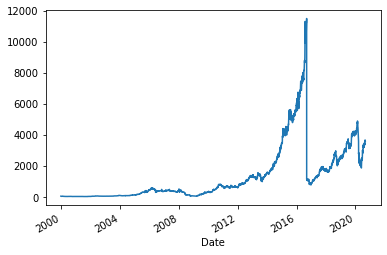

In [8]:
df["VWAP"].plot()

In [9]:
df.shape

(5070, 14)

In [10]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [13]:
data = df.copy()

In [14]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [15]:
lag_features = ["High", "Low", "Volume", "Turnover", "Trades"]
window1 = 3
window2 = 7

In [16]:
for feature in lag_features:
    data[feature + "_Rolling_mean_3"] = data[feature].rolling(window = window1).mean()
    data[feature + "_Rolling_mean_7"] = data[feature].rolling(window = window2).mean()

In [17]:
for feature in lag_features:
    data[feature + "_Rolling_std_3"] = data[feature].rolling(window = window1).std()
    data[feature + "_Rolling_std_7"] = data[feature].rolling(window = window2).std()

In [18]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_Rolling_mean_3', 'High_Rolling_mean_7',
       'Low_Rolling_mean_3', 'Low_Rolling_mean_7', 'Volume_Rolling_mean_3',
       'Volume_Rolling_mean_7', 'Turnover_Rolling_mean_3',
       'Turnover_Rolling_mean_7', 'Trades_Rolling_mean_3',
       'Trades_Rolling_mean_7', 'High_Rolling_std_3', 'High_Rolling_std_7',
       'Low_Rolling_std_3', 'Low_Rolling_std_7', 'Volume_Rolling_std_3',
       'Volume_Rolling_std_7', 'Turnover_Rolling_std_3',
       'Turnover_Rolling_std_7', 'Trades_Rolling_std_3',
       'Trades_Rolling_std_7'],
      dtype='object')

In [19]:
data.shape

(2291, 34)

In [20]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High_Rolling_std_3,High_Rolling_std_7,Low_Rolling_std_3,Low_Rolling_std_7,Volume_Rolling_std_3,Volume_Rolling_std_7,Turnover_Rolling_std_3,Turnover_Rolling_std_7,Trades_Rolling_std_3,Trades_Rolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN


In [21]:
data.isna().sum()

Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                     0
Deliverable Volume         0
%Deliverble                0
High_Rolling_mean_3        2
High_Rolling_mean_7        6
Low_Rolling_mean_3         2
Low_Rolling_mean_7         6
Volume_Rolling_mean_3      2
Volume_Rolling_mean_7      6
Turnover_Rolling_mean_3    2
Turnover_Rolling_mean_7    6
Trades_Rolling_mean_3      2
Trades_Rolling_mean_7      6
High_Rolling_std_3         2
High_Rolling_std_7         6
Low_Rolling_std_3          2
Low_Rolling_std_7          6
Volume_Rolling_std_3       2
Volume_Rolling_std_7       6
Turnover_Rolling_std_3     2
Turnover_Rolling_std_7     6
Trades_Rolling_std_3       2
Trades_Rolling_std_7       6
dtype: int64

In [22]:
data.dropna(inplace=True)

In [24]:
ind_features = ['High_Rolling_mean_3', 'High_Rolling_mean_7',
       'Low_Rolling_mean_3', 'Low_Rolling_mean_7', 'Volume_Rolling_mean_3',
       'Volume_Rolling_mean_7', 'Turnover_Rolling_mean_3',
       'Turnover_Rolling_mean_7', 'Trades_Rolling_mean_3',
       'Trades_Rolling_mean_7', 'High_Rolling_std_3', 'High_Rolling_std_7',
       'Low_Rolling_std_3', 'Low_Rolling_std_7', 'Volume_Rolling_std_3',
       'Volume_Rolling_std_7', 'Turnover_Rolling_std_3',
       'Turnover_Rolling_std_7', 'Trades_Rolling_std_3',
       'Trades_Rolling_std_7']

In [25]:
training_data = data[0:1800]
test_data = data[1800:]

In [26]:
from pmdarima import auto_arimaarima

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
model = auto_arima(y=training_data["VWAP"], X = training_data[ind_features], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.536, Time=3.83 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.224, Time=1.95 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.348, Time=2.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.320, Time=3.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=1.84 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.234, Time=3.65 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 16.620 seconds


D:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1886: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
D:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1893: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [32]:
model.fit(training_data["VWAP"], training_data[ind_features])

ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [33]:
prediction = model.predict( n_periods=len(test_data), X=test_data[ind_features])

In [34]:
prediction 

array([2600.75552937, 2625.16207487, 2601.00799992, 2556.42834002,
       2572.88531908, 2509.17332756, 2223.65050517, 2289.48716623,
       2479.71340831, 2279.22431726, 2185.12132666, 2117.3463402 ,
       2083.3442304 , 2153.62316675, 2115.9970013 , 2030.25898038,
       1924.97262258, 1981.27368861, 2025.71070926, 2084.61662942,
       2139.82718327, 2060.68253387, 2186.2539105 , 2156.7342677 ,
       2106.69746883, 2157.83286652, 2076.4013318 , 2211.91547397,
       2240.77047685, 2243.70825168, 2296.82672924, 2304.64675737,
       2325.30305371, 2380.37437844, 2336.02230504, 2341.37055429,
       2335.78498248, 2317.10288908, 2325.54338668, 2292.52458241,
       2312.38100247, 2328.52178511, 2309.4461079 , 2355.86519369,
       2343.80405965, 2377.62888636, 2385.3035566 , 2372.60735859,
       2382.24164115, 2378.83337849, 2384.72031681, 2447.69686888,
       2457.48429226, 2482.96403054, 2507.49824171, 2494.45896682,
       2452.95099678, 2441.74662704, 2428.13910592, 2377.58638

In [36]:
test_data["forecast_ARIMA"] = prediction

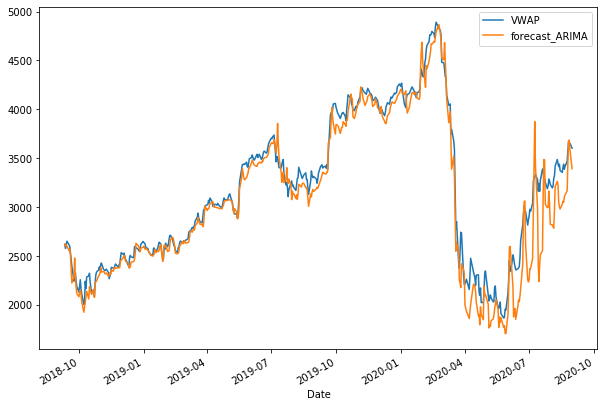

In [39]:
test_data[["VWAP", "forecast_ARIMA"]].plot(figsize=(10,7))

Now let's evaluate the auto ARIMA model.

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
rmse = np.sqrt(mean_squared_error(test_data["VWAP"], test_data["forecast_ARIMA"]))

In [42]:
rmse

187.77545472730867

In [45]:
mae = mean_absolute_error(test_data["VWAP"], test_data["forecast_ARIMA"])

In [46]:
mae

124.6480740444013